In [22]:
import pandas as pd
import numpy as np
from pickle import load
from nltk.cluster import KMeansClusterer, euclidean_distance
import matplotlib.pyplot as plt
from typing import Dict

In [2]:
with open("df after category with tf after normalization.pcl","rb") as file:
    X:pd.DataFrame=load(file)

In [3]:
with open("df after category with tf.pcl", 'rb') as file:
    df: pd.DataFrame = load(file)
y=df["category"]

In [5]:
model=KMeansClusterer(4, euclidean_distance, repeats=10,avoid_empty_clusters=True)

clusters = model.cluster(X.to_numpy(), True)

In [6]:
X['cluster']=clusters
X['category']=y

In [7]:
X['cluster'].value_counts()

0    143
1     49
2      4
3      2
Name: cluster, dtype: int64

<AxesSubplot:>

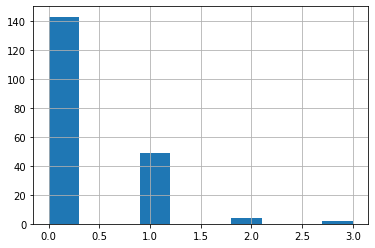

In [8]:
X['cluster'].hist()

In [12]:
new_df=X.query("cluster==0 or cluster==1").drop(columns=['cluster','category'])

In [13]:
len(X)-6,len(new_df)

(192, 192)

In [14]:
model=KMeansClusterer(4, euclidean_distance, repeats=10,avoid_empty_clusters=True)

clusters = model.cluster(new_df.to_numpy(), True)

(array([82.,  0.,  0., 61.,  0.,  0., 39.,  0.,  0., 10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

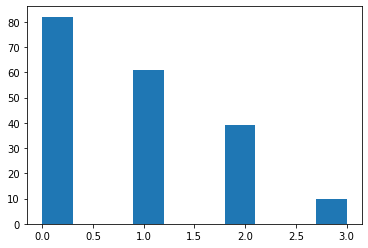

In [18]:
plt.hist(clusters)

In [23]:
cl_amount:Dict[int,int]={}
for cl in set(clusters):
    cl_amount[cl]=clusters.count(cl)

In [29]:
print(*cl_amount.items(),sep="\n")

(0, 82)
(1, 61)
(2, 39)
(3, 10)


In [3]:
10/(82+61+39+10)

0.052083333333333336